# This notebook shows the calibrated FUSE output and compares with unregulated streamflow observations

In [13]:
import xarray as xr
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import numpy as np
import pandas as pd

jtplot.style(theme='grade3')

In [14]:
# User-Supplied
file = '/glade/p/work/manab/ff/islandpark/output/001_001_runs_best.nc'   # Fuse output file
forc = '/glade/p/work/manab/ff/islandpark/inputnew/001.nc'   #Forcing file

In [15]:
out = xr.open_dataset(file)
forc = xr.open_dataset(forc, engine='netcdf4')
print("All variables available in the Output file: ", list(out.variables.keys()))

def plotncvar(ncdat, ncvar, xlabel, ylabel):
    plt.figure(figsize=(15, 5))
    ncdat[ncvar].plot()
    plt.title(' ')
    plt.ylabel(xlabel, fontsize = 16)
    plt.xlabel(ylabel, fontsize = 16)
    plt.legend()
    plt.show()

All variables available in the Output file:  ['ppt', 'pet', 'obsq', 'watr_1', 'watr_2', 'swe_tot', 'evap_1', 'evap_2', 'q_instnt', 'q_routed', 'time', 'latitude', 'longitude']


# FUSE output

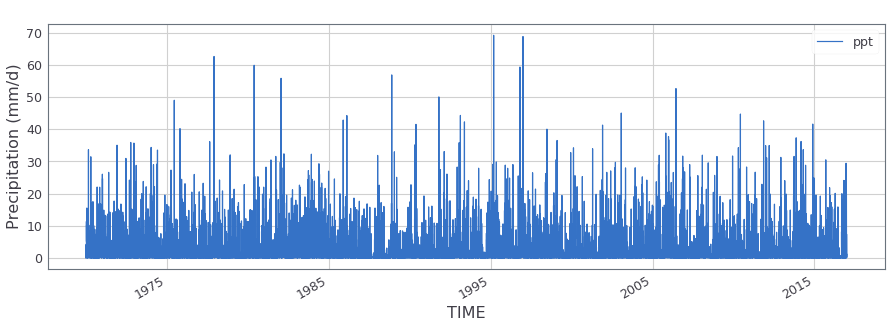

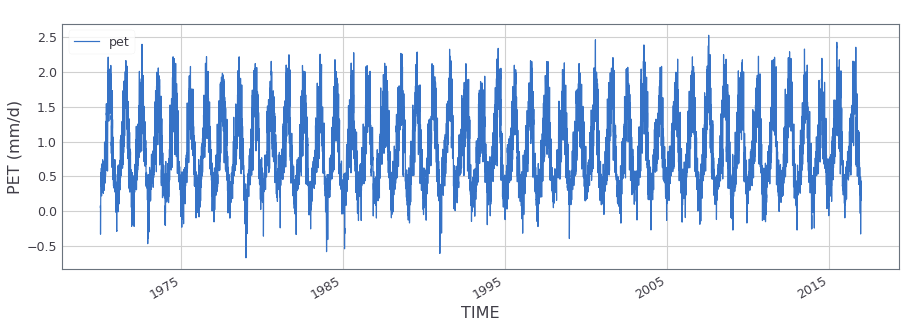

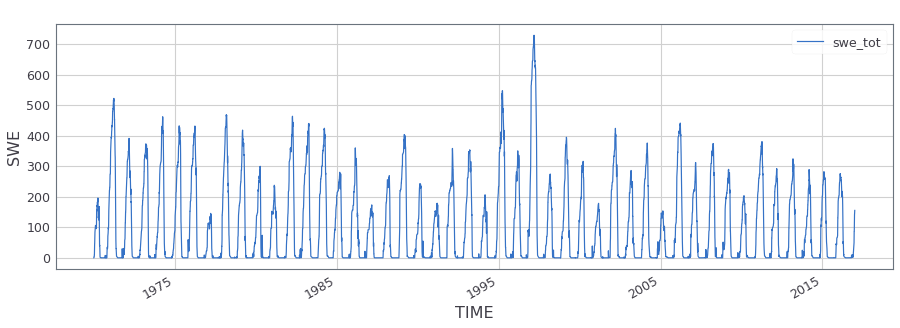

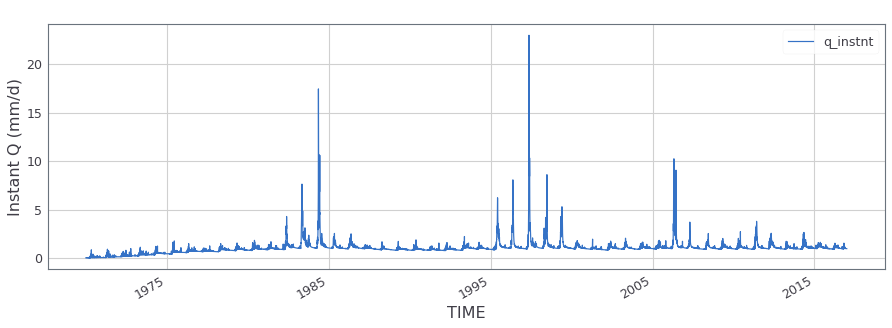

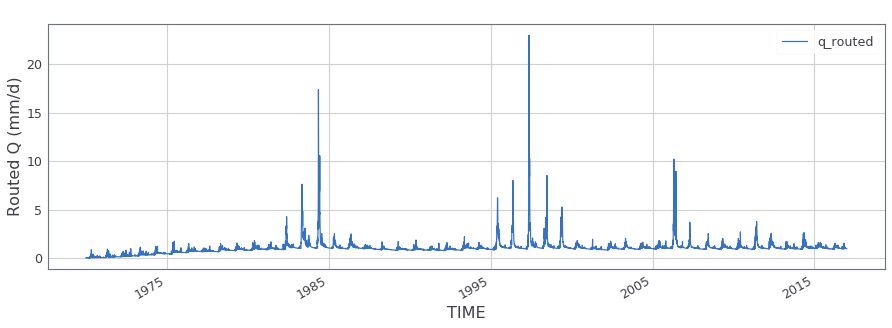

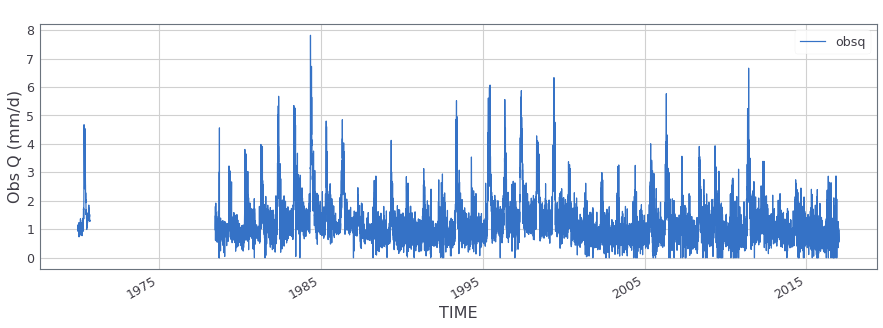

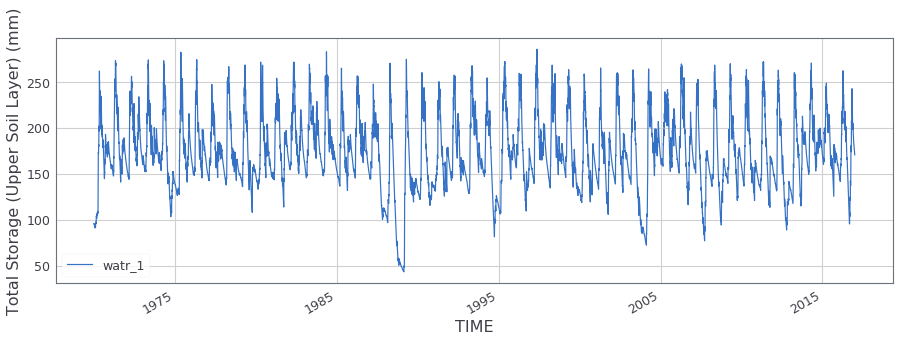

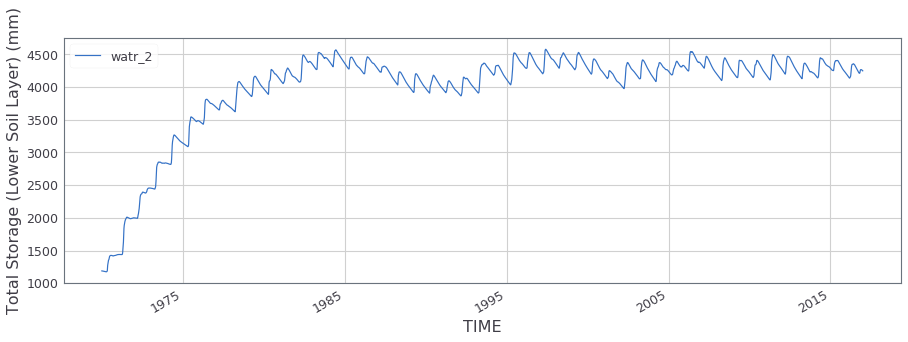

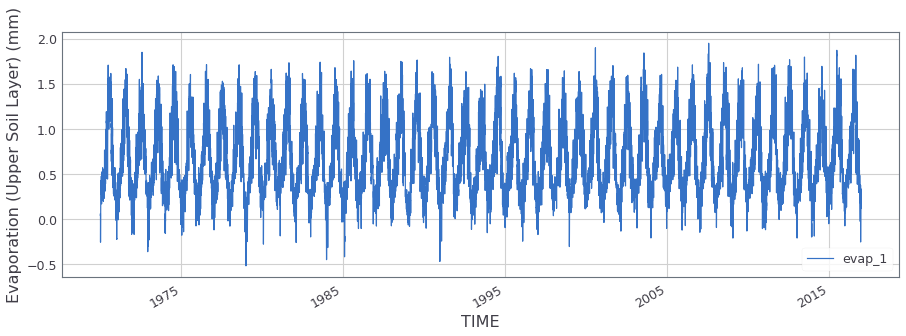

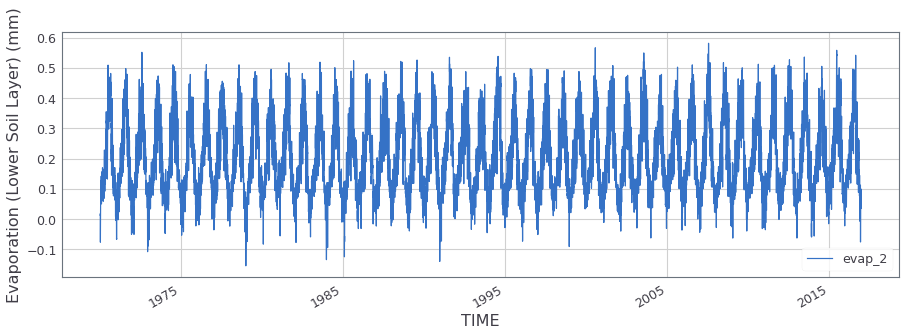

In [16]:
plotncvar(out, 'ppt', 'Precipitation (mm/d)', 'TIME')
plotncvar(out, 'pet', 'PET (mm/d)', 'TIME')
plotncvar(out, 'swe_tot', 'SWE', 'TIME')
plotncvar(out, 'q_instnt', 'Instant Q (mm/d)', 'TIME')
plotncvar(out, 'q_routed', 'Routed Q (mm/d)', 'TIME')
plotncvar(out, 'obsq', 'Obs Q (mm/d)', 'TIME')
plotncvar(out, 'watr_1', 'Total Storage (Upper Soil Layer) (mm)', 'TIME')
plotncvar(out, 'watr_2', 'Total Storage (Lower Soil Layer) (mm)', 'TIME')
plotncvar(out, 'evap_1', 'Evaporation (Upper Soil Layer) (mm)', 'TIME')
plotncvar(out, 'evap_2', 'Evaporation (Lower Soil Layer) (mm)', 'TIME')

# Plot of FUSE Routed flow and Observation

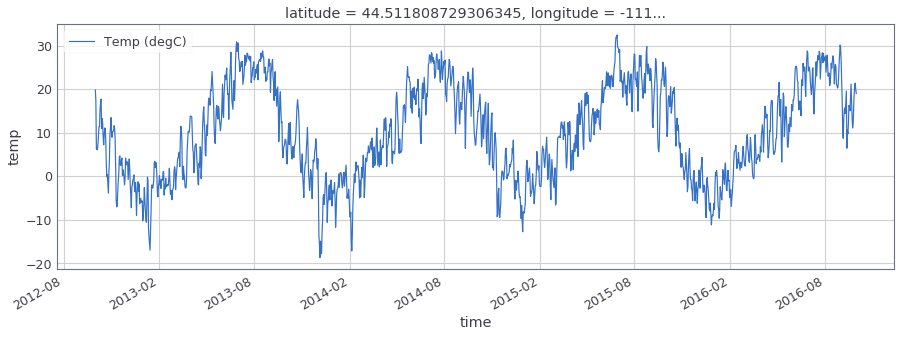

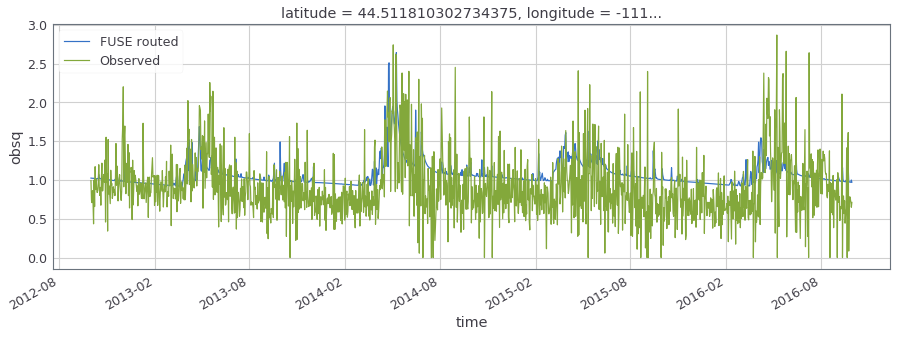

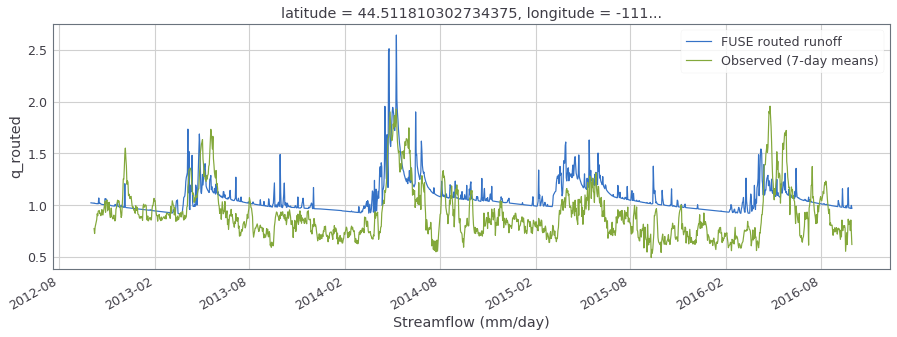

In [21]:
starttime = '2012-10-01'
endtime = '2016-09-30'

# obs2 = obs['unregflow'].rolling(window = 1, freq="m").mean().dropna()  # Monthly means for smoothing
obs2 = out['obsq'].rolling(time=7).mean().dropna('time')

plt.figure(figsize=(15,5))
plt.xlabel('Streamflow (mm/day)')
forc['temp'].loc[starttime: endtime].plot(label = 'Temp (degC)')
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.xlabel('Streamflow (mm/day)')
out['q_routed'].loc[starttime: endtime].plot(label = 'FUSE routed')
out['obsq'].loc[starttime: endtime].plot(label = 'Observed')
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
out['q_routed'].loc[starttime: endtime].plot(label = 'FUSE routed runoff')
#unreg.loc[starttime: endtime].plot(label = 'Observed flow (Unregulated)', color = 'blue')
#out2['obsq'].loc[starttime: endtime].plot(label = 'Observed flow (Unregulated monthly means)', color = 'grey')
out['obsq'].loc[starttime: endtime].rolling(time=7).mean().dropna('time').plot(label = 'Observed (7-day means)')
plt.xlabel('Streamflow (mm/day)')
plt.legend()
plt.show()